# Visualização de Dados

### Titanic

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
data = pd.read_csv('titanic/train.csv')

In [4]:
data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data.columns = ['IdPassageiro', 'Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade', 
                'IrmaosConjuge','PaisFilhos', 'Bilhete', 'Tarifa', 'Cabine', 'Embarque']

In [6]:
data['Sexo'].replace({'male': 'homem', 'female': 'mulher'}, inplace=True)

C:\Users\caiod\AppData\Local\Temp\ipykernel_20236\1501177904.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Sexo'].replace({'male': 'homem', 'female': 'mulher'}, inplace=True)


In [7]:
data['Cabine'] = data['Cabine'].apply(lambda x: x[0] if pd.notna(x) else np.nan)

### Matplotlib

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

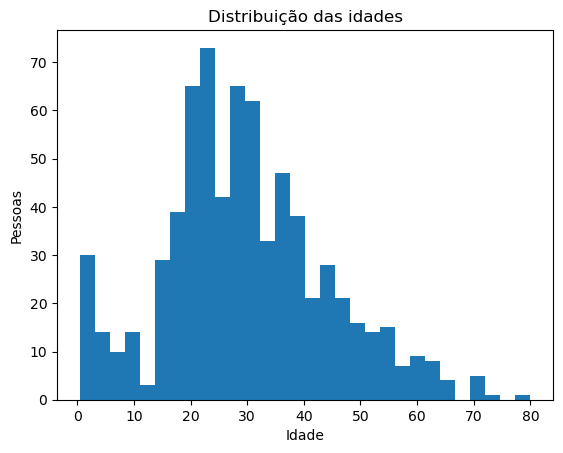

In [9]:
plt.hist(data['Idade'].dropna(), bins =30)
plt.title('Distribuição das idades')
plt.ylabel('Pessoas')
plt.xlabel('Idade')


plt.show()

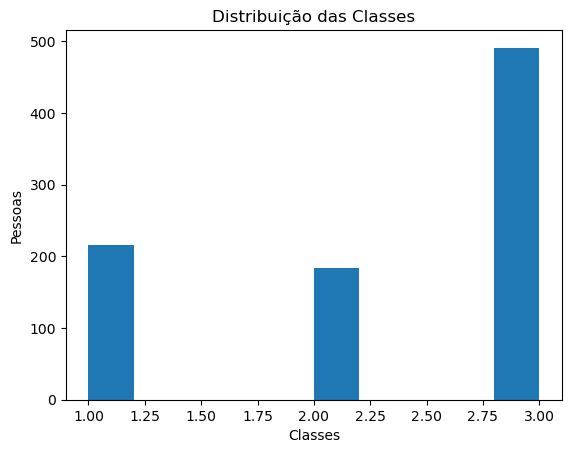

In [10]:
plt.hist(data['Classe'])
plt.title('Distribuição das Classes')
plt.ylabel('Pessoas')
plt.xlabel('Classes')


plt.show()

### Subplots - 1ª Forma

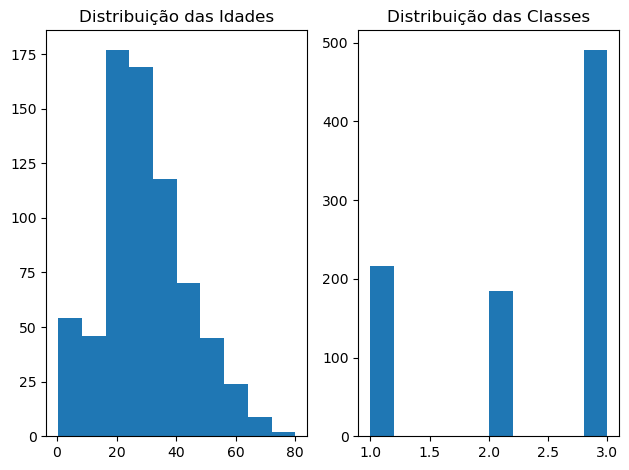

In [11]:
plt.subplot(1,2,1)
plt.hist(data['Idade'].dropna())
plt.title('Distribuição das Idades')


plt.subplot(1,2,2)
plt.hist(data['Classe'])
plt.title('Distribuição das Classes')
plt.tight_layout()
plt.show()

### Subplots - 2ª Forma

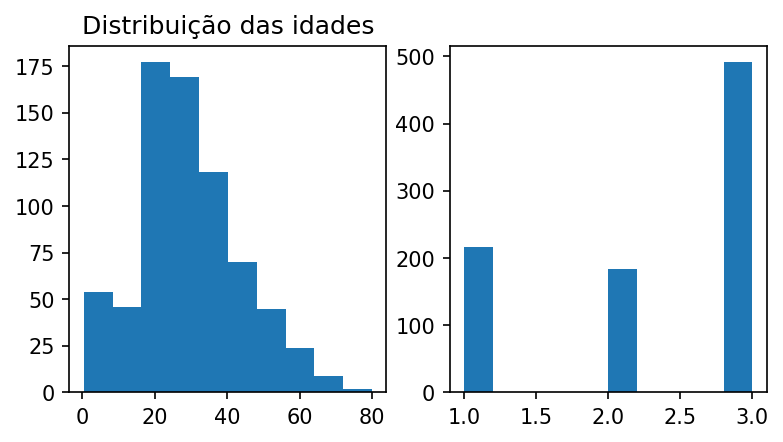

In [12]:
f, ax = plt.subplots(1,2, figsize=(6,3), dpi =150)
ax[0].hist(data['Idade'].dropna())
ax[0].set_title('Distribuição das idades')

ax[1].hist(data['Classe'].dropna())
plt.show()

### Seaborn

In [13]:
import seaborn as sns

In [14]:
data['Idade'].value_counts()

Idade
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64

### pie e countplot

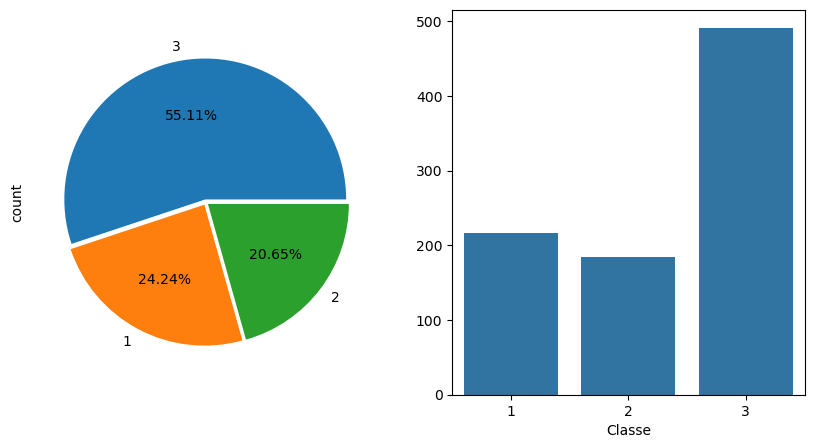

In [15]:
f , ax = plt.subplots(1, 2, figsize=(10, 5))

data['Classe'].value_counts().plot.pie( ax=ax[0], explode=[0.02,0.02,0.02], autopct='%0.2f%%')
sns.countplot(x ='Classe', data=data, ax=ax[1])
ax[1].set_ylabel('')
plt.show()

### countplot  e hue

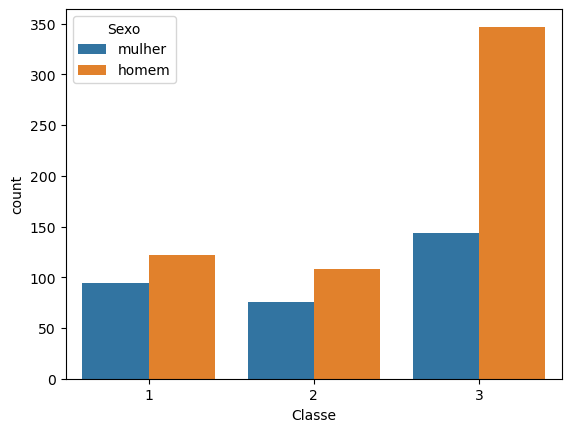

In [16]:

sns.countplot(x='Classe', hue='Sexo', data=data)
plt.show()


### boxplot

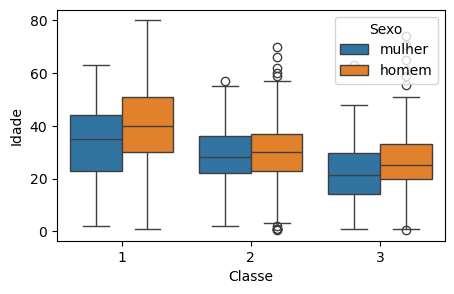

In [17]:
plt.figure(figsize=(5,3), dpi=100)
sns.boxplot(x='Classe', y= 'Idade', hue = 'Sexo', data=data)
plt.show()

### violinplot

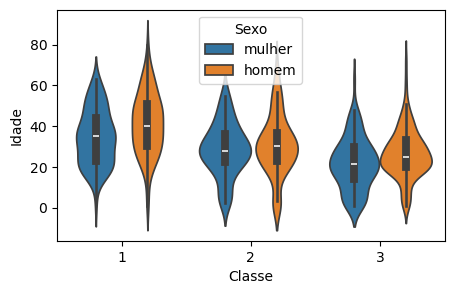

In [18]:
plt.figure(figsize=(5,3), dpi=100)
sns.violinplot(x='Classe', y= 'Idade', hue = 'Sexo', data=data)
plt.show()

### FacetGrid com hist

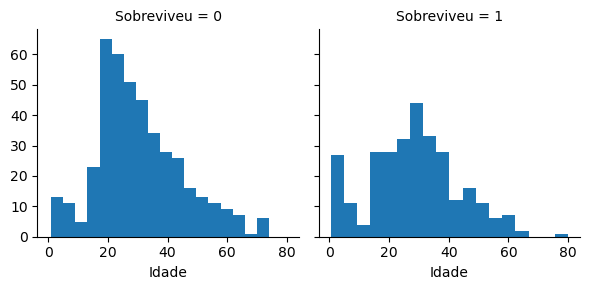

In [19]:
g = sns.FacetGrid(data, col ='Sobreviveu')
g.map(plt.hist, 'Idade', bins = 18)
plt.show()

### FacetGrid com barplot

C:\Users\caiod\.anaconda\3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


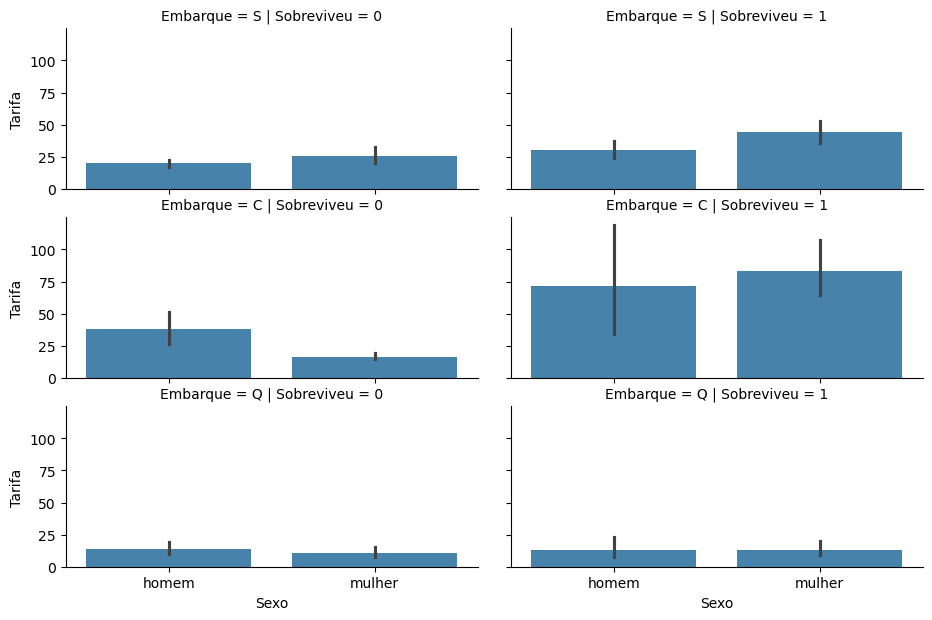

In [20]:
g= sns.FacetGrid(data, row= 'Embarque', col = 'Sobreviveu')
g.map(sns.barplot, 'Sexo' , 'Tarifa', alpha = 0.9)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

### FacetGrid com distplot

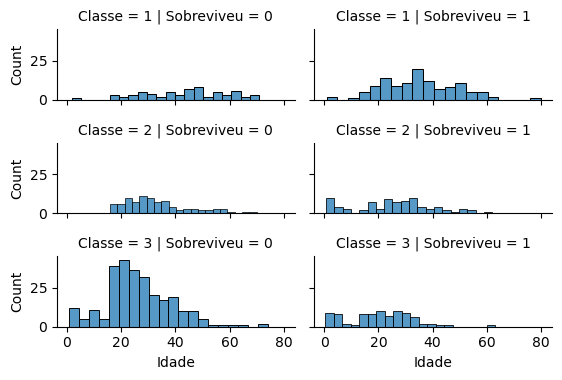

In [21]:
g = sns.FacetGrid(data, col='Sobreviveu', row='Classe', height=1.3, aspect =2.2)
g.map(sns.histplot, 'Idade', bins=20)  # usa histplot, que funciona com FacetGrid

plt.show()


### catplot do tipo "point"

C:\Users\caiod\AppData\Local\Temp\ipykernel_20236\1359894316.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1)` for the same effect.

  sns.catplot(x='Embarque',y= 'Sobreviveu', data=data, kind='point', ci=1)


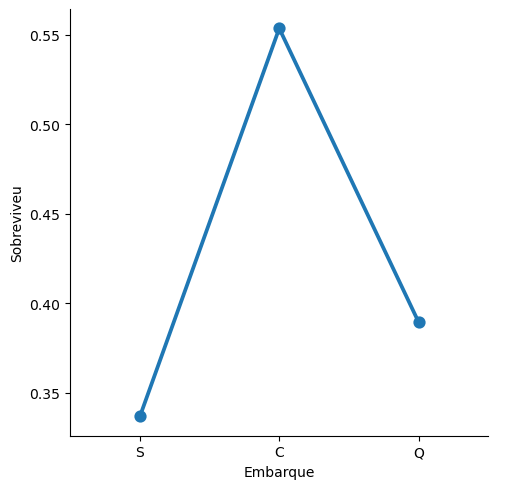

In [22]:
sns.catplot(x='Embarque',y= 'Sobreviveu', data=data, kind='point', ci=1)
plt.show()

### FacetGrid com pointplot

C:\Users\caiod\.anaconda\3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\caiod\.anaconda\3\Lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\caiod\.anaconda\3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\caiod\.anaconda\3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\caiod\.anaconda\3\Lib\site-packages\seaborn\axisgrid.py:854: Fu

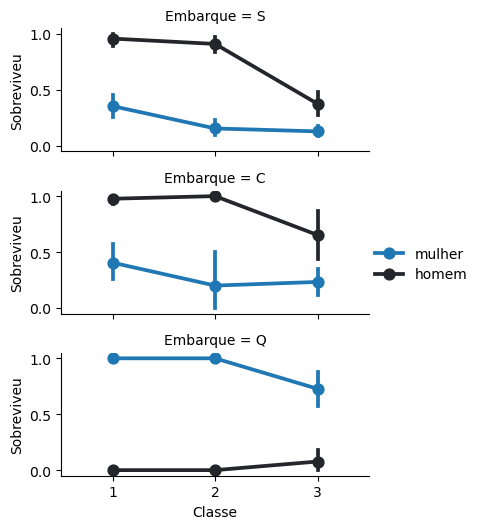

In [23]:
g= sns.FacetGrid(data, row='Embarque' , height =1.8, aspect=2.2)
g.map(sns.pointplot, 'Classe', 'Sobreviveu', 'Sexo')
g.add_legend()
plt.show()

### heatmap

In [24]:
data.isnull().sum()


IdPassageiro       0
Sobreviveu         0
Classe             0
Nome               0
Sexo               0
Idade            177
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             0
Cabine           687
Embarque           2
dtype: int64

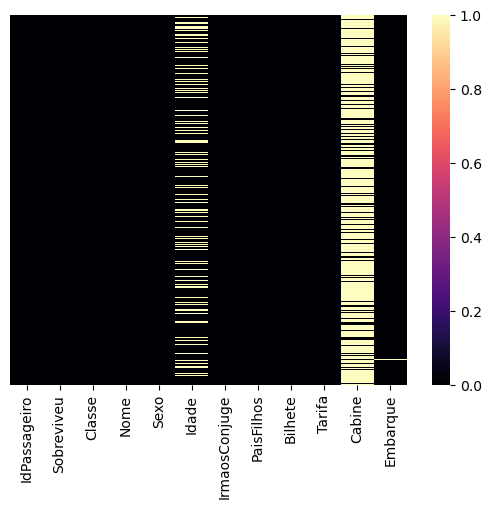

In [25]:
sns.heatmap(data.isnull(), yticklabels= False , cmap = 'magma')
plt.show()

### relplot

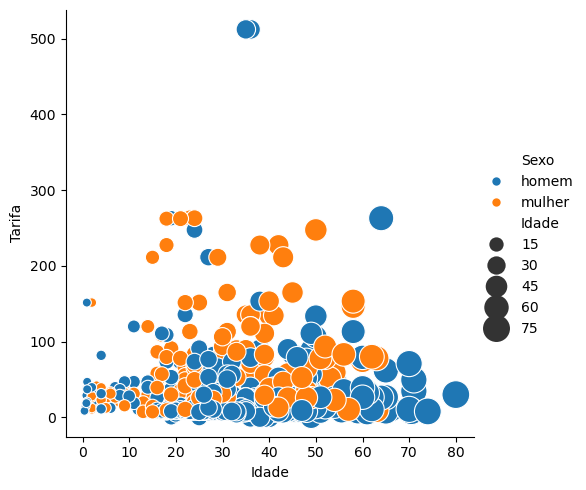

In [26]:
sns.relplot(x= 'Idade', y= 'Tarifa', hue = 'Sexo' , data=data, size='Idade', sizes=(40,400))
plt.show()

### scatterplot

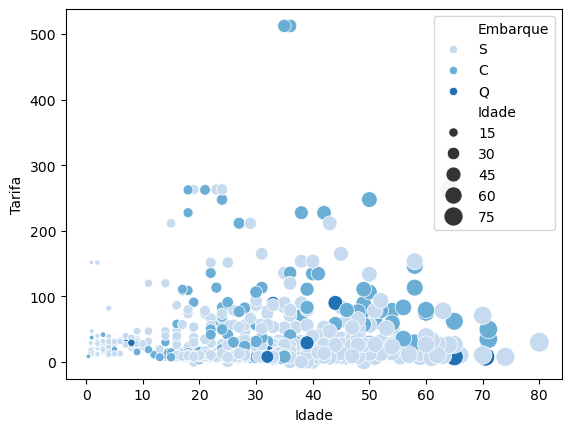

In [27]:
sns.scatterplot(x= 'Idade', y= 'Tarifa', hue = 'Embarque', size = 'Idade', palette = 'Blues' , data=data, sizes= (10,200))
plt.show()

### pairplot

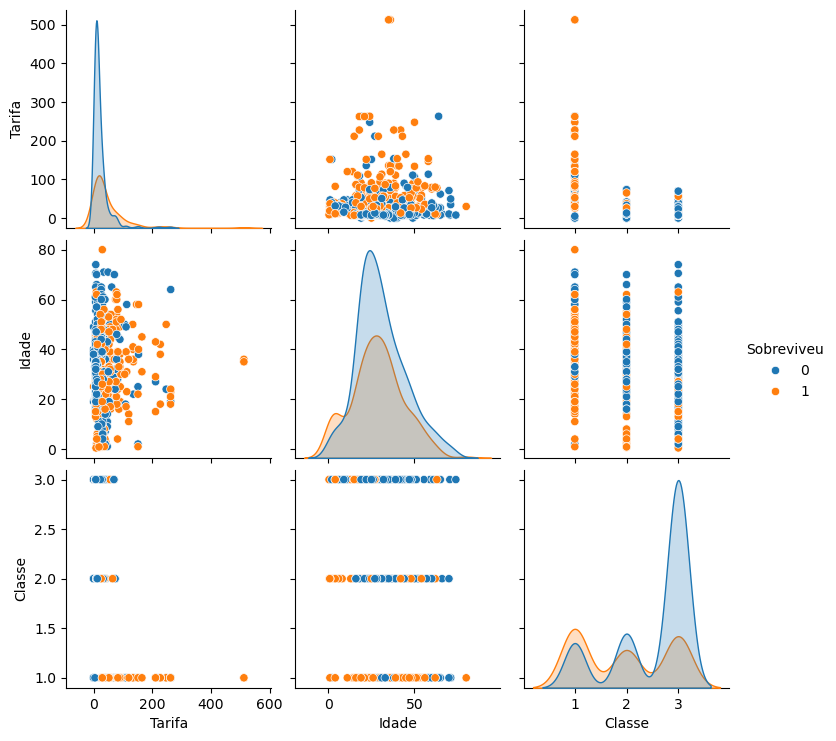

In [28]:
sns.pairplot(data[['Tarifa', 'Idade', 'Classe', 'Sexo', 'Embarque', 'Sobreviveu']], hue='Sobreviveu')
plt.show()

### jointplot tipo "kde"

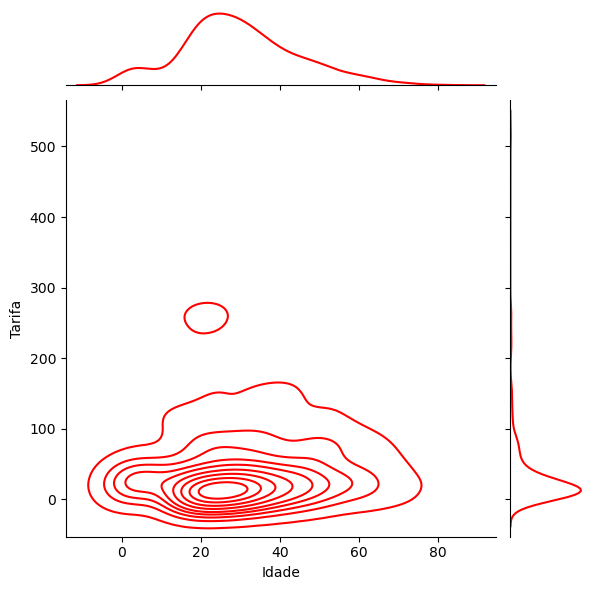

In [29]:
sns.jointplot(x='Idade',y='Tarifa',  data=data , kind='kde', color = 'r')
plt.show()

### jointplot tipo "reg"

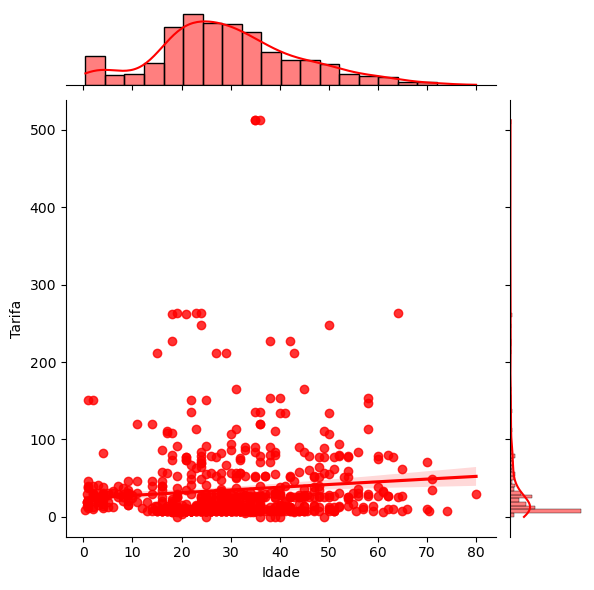

In [30]:
sns.jointplot(x='Idade',y='Tarifa',  data=data , kind='reg', color = 'r')
plt.show()

### kdeplot

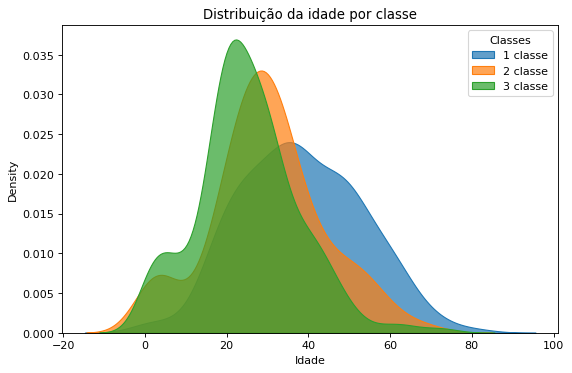

In [31]:
plt.figure(figsize= (8,5), dpi =80)
sns.kdeplot(data['Idade'].loc[data['Classe']==1], fill=True, label='1 classe', alpha =0.7)
sns.kdeplot(data['Idade'].loc[data['Classe']==2], fill=True, label='2 classe', alpha =0.7)
sns.kdeplot(data['Idade'].loc[data['Classe']==3], fill=True, label='3 classe', alpha =0.7)

plt.legend(title='Classes')  # força a legenda aparecer
plt.title('Distribuição da idade por classe')
plt.show()


### catplot do tipo "count"

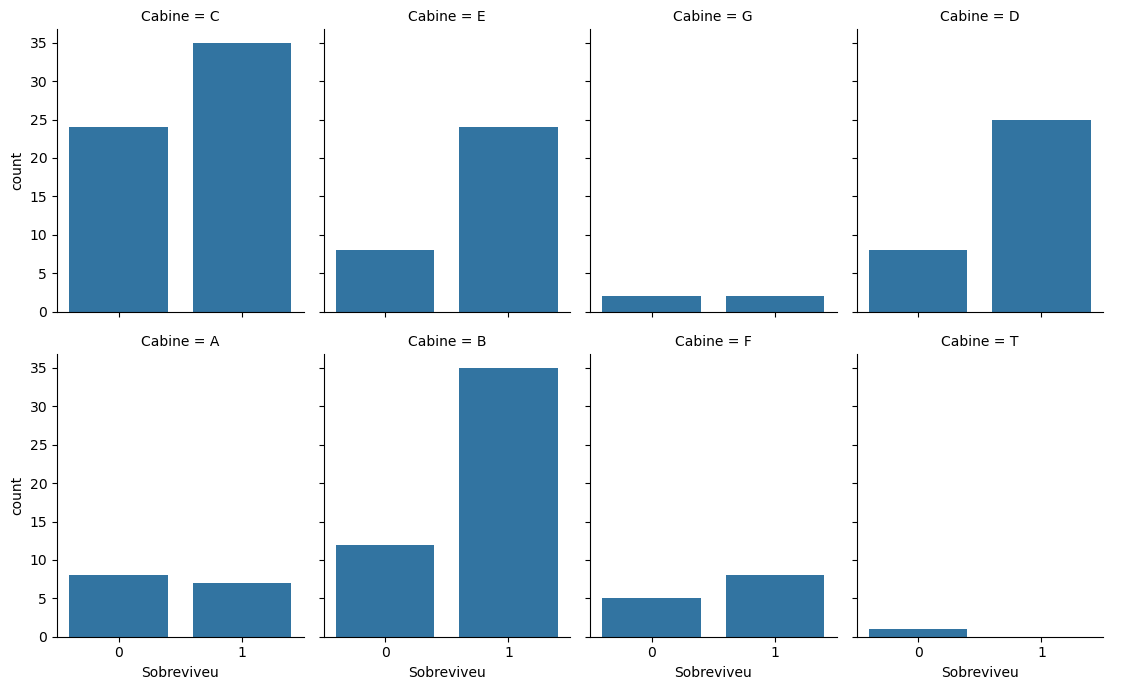

In [32]:
sns.catplot(x='Sobreviveu', col='Cabine', data=data[['Sobreviveu', 'Cabine']].dropna(), kind = 'count', height=3.5, aspect=0.8, col_wrap=4)
plt.show()

### heatmap corr()

In [33]:
plt.figure(figsize=(10,7))

sns.heatmap(
    data[['Classe', 'Idade', 'Sobreviveu', 'Tarifa','Embarque_Q','Embarque_S' ]].corr(), 
    cmap='Blues', annot=True
)

plt.show()


KeyError: "['Embarque_Q', 'Embarque_S'] not in index"

In [ ]:
data = pd.get_dummies(data=data, columns=['Embarque'], drop_first=True)


In [ ]:
data.head()

### plot

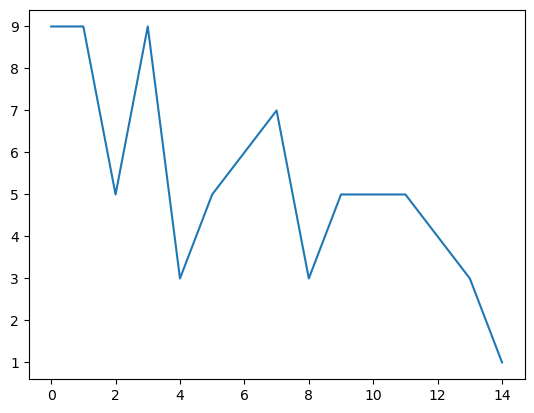

In [63]:
x = np.random.randint(0,10,15)
plt.plot(x)
plt.show()

In [64]:
x

array([9, 9, 5, 9, 3, 5, 6, 7, 3, 5, 5, 5, 4, 3, 1], dtype=int32)

### linspace

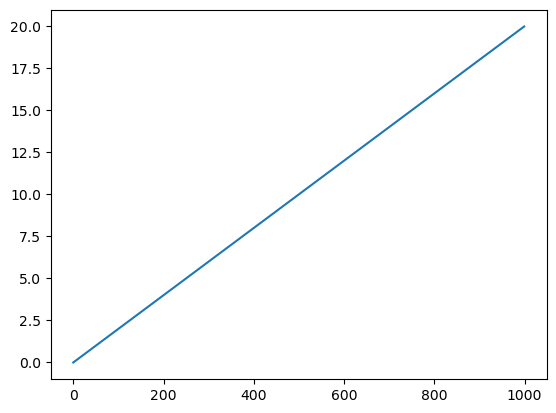

In [47]:
x= np.linspace(0,20,1000)
x
plt.plot(x)
plt.show()


In [66]:
y= 2*x**3 + 2*x*2 - 5*x

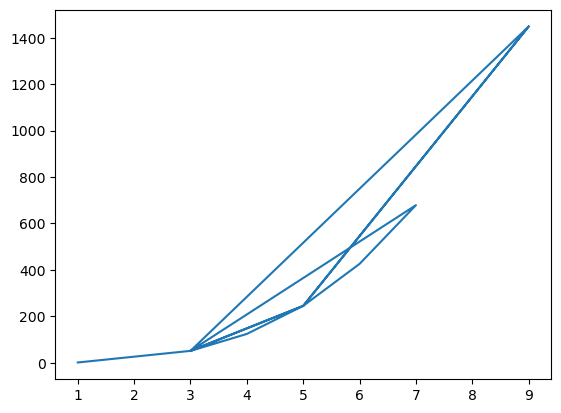

In [67]:
plt.plot(x,y)
plt.show()

### normal

Fontes:
* https://matplotlib.org/gallery/index.html
* https://seaborn.pydata.org/examples/index.html
* https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#1.-Scatter-plot
* https://matplotlib.org/tutorials/colors/colormaps.html